In [1]:
import pandas as pd
df = pd.read_csv('clientes.csv', delimiter=';')
print(f"Tamaño del Dataset: {df.shape}")

Tamaño del Dataset: (4521, 17)


## Pasos a seguir
1. Exploracion de la data
2. Preprocesamiento
3. Regresion Logistica
4. Seleccion de variables: Random Forrest 
5. Resultados y evluacion del modeo

<font color="red">Hay que ser prolijos!</font>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [5]:
df.y.value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [6]:
df.y.value_counts(normalize=True)

no     0.88476
yes    0.11524
Name: y, dtype: float64

https://colorbrewer2.org/#type=sequential&scheme=BuGn&n=3

<AxesSubplot:xlabel='y', ylabel='count'>

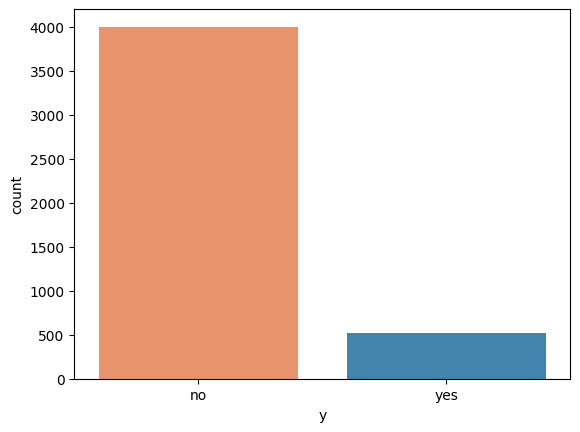

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x="y",data=df, palette = ["#fc8d59","#3288bd"])

In [17]:
list(df)

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

In [18]:
df.age.describe()

count    4521.000000
mean       41.170095
std        10.576211
min        19.000000
25%        33.000000
50%        39.000000
75%        49.000000
max        87.000000
Name: age, dtype: float64

In [19]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


¿Estas medias, medidas de posicion y dispersion cambian según el target?

In [23]:
df.groupby("y").mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
0,40.998000,1403.211750,15.948750,226.347500,2.862250,36.006000,0.471250
1,42.491363,1571.955854,15.658349,552.742802,2.266795,68.639155,1.090211


In [22]:
import numpy as np
df["y"] = np.where(df["y"]=="yes",1,0)

In [26]:
print('Edad Max: ', df['age'].max())
print('Mediana de la edad: ', df['age'].median())
print('Promedio de la edad: ', df['age'].mean())
print('Edad Min: ', df['age'].min())

Edad Max:  87
Mediana de la edad:  39.0
Promedio de la edad:  41.17009511170095
Edad Min:  19


In [27]:
df['age'].quantile(q = 0.75)

49.0

In [28]:
df.age.describe()

count    4521.000000
mean       41.170095
std        10.576211
min        19.000000
25%        33.000000
50%        39.000000
75%        49.000000
max        87.000000
Name: age, dtype: float64

In [30]:
print('La duración arriba de: ',df['age'].quantile(q = 0.75) + 
                      1.5*(df['age'].quantile(q = 0.75) - df['age'].quantile(q = 0.25)), 'son outliers')

La duración arriba de:  73.0 son outliers


In [33]:
cross_tab_trabajo = pd.crosstab(df['y'],df['job'])
cross_tab_trabajo


job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
y,,,,,,,,,,,,
0,420,877,153,98,838,176,163,379,65,685,115,31
1,58,69,15,14,131,54,20,38,19,83,13,7


In [ ]:
cross_tab_trabajo = pd.crosstab(df['y'],df['job']).apply(lambda x: x/x.sum() * 100)
